# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the dataset

In [2]:
# reading the csv file
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

# top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

There is no use of **'Time'** column. And the **'Amount'** column values vary in range compared to other columns. We have to normalize the values in **'Amount'** column before feeding it to the model.

The other columns values are the result of PCA transformation as mentioned by the author in the details of the dataset. It also means the data was cleaned.

In [3]:
# normalizing Amount column using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# creating a new column containing normalized amount values
df['normAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

# dropping Time and Amount columns
df.drop(['Time','Amount'], axis = 1, inplace = True)

In [4]:
# top 5 rows
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


I prefer to have the target column as the last column in the dataframe as it is easy while splitting the features and target labels which we will do afterwards.

In [5]:
# function to swap columns in dataframe

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a, b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

In [6]:
# swapping Class and normAmount columns

df = swap_columns(df, 'Class', 'normAmount')

In [7]:
# top 1 row

df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0


Calculating the proportions of the target variable

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

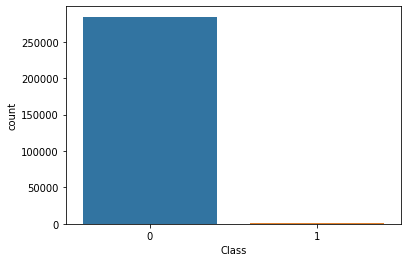

In [9]:
# visualizing the result
sns.countplot(data = df, x = 'Class')

Clearly there is a significant different in the count of the two classes. This means the dataset is imbalanced.

We cannot train our future model with the imbalanced dataset. There is a way to handle the imbalanced dataset i.e., **Resampling**.

* Resampling is a series of techniques used in statistics to gather more information about a sample.

However we will apply resampling only on the training dataset. So, let us split the data first.

# Splitting the dataset

In [10]:
# X --> Feature columns, y --> Target column

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
# splitting the training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    stratify = y,
                                                    random_state = 42)

* **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [12]:
# checking for proportions of normal and fraud transactions in training and testing datasets
print('Training Dataset: \n', pd.value_counts(y_train))
print('\nTesting Dataset: \n', pd.value_counts(y_test))

Training Dataset: 
 0    227451
1       394
Name: Class, dtype: int64

Testing Dataset: 
 0    56864
1       98
Name: Class, dtype: int64


The dataset is divided into equal class proportions. Now we have to do the resampling.

Generally, there are two types of resampling methods.
1. Random Oversampling
2. Random Undersampling

However, resampling has drawbacks, especially when the target class is as highly imbalanced as in our case.

Firstly, oversampling the minority class might lead to overfitting, i.e. the model learns patterns that only exist in the particular sample that has been oversampled.

Secondly, undersampling the majority class might lead to underfitting, i.e. the model fails to capture the general pattern in the data.

There are many variations of resampling. We will use **Synthetic Minority Oversampling Technique (SMOTE)** which uses oversampling method.

Also there is **Near Miss Algorithm** which uses undersampling method. In this case, we will use SMOTE.

# Resampling the Dataset using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

# resampling training data
X_train_os, y_train_os = sm.fit_resample(X_train, y_train.ravel())

In [14]:
# number of rows containing normal and fraud transactions before oversampling
print('Number of Normal Transactions before oversampling: ',len(y_train[y_train == 0]))
print('Number of Fraud Transactions before oversampling: ',len(y_train[y_train == 1]))

Number of Normal Transactions before oversampling:  227451
Number of Fraud Transactions before oversampling:  394


In [15]:
# number of rows containing normal and fraud transactions after oversampling
print('Number of Normal Transactions after oversampling: ',len(y_train_os[y_train_os == 0]))
print('Number of Fraud Transactions after oversampling: ',len(y_train_os[y_train_os == 1]))

Number of Normal Transactions after oversampling:  227451
Number of Fraud Transactions after oversampling:  227451


# Training XGBoost model on the resampled training dataset

As we have sufficient data, we can proceed further to train the model. I chose XGBoost model.

In [16]:
from xgboost import XGBClassifier
clf = XGBClassifier(objective = 'binary:logistic', random_state = 42)

# fitting the resampled training dataset
clf.fit(X_train_os, y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

# Evaluating the model

In [17]:
# testing the model on testing dataset
y_pred = clf.predict(X_test)

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy of the testing data is: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

[[56831    33]
 [   11    87]]
Accuracy of the testing data is: 99.92 %


Even though the accuracy is almost 100% we can see there are still some missclassified points.

33 were classified as **False Positives** (classified as Fraud while they are Normal transactions)

11 were classified as **False Negatives** (classified as Normal while they are Fraud transactions)

We have to be careful about False Negatives as they affect a lot. So the accuracy is not the merit we are looking for.

Rather we use **Precision (for False Positives), Recall (for False Negatives), and F-Score (for both the affects)**

## Precision, Recall, and F-Score

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision is: {:.2f} %'.format(precision_score(y_test, y_pred)*100))
print('Recall is: {:.2f} %'.format(recall_score(y_test, y_pred)*100))
print('F-score is: {:.2f} %'.format(f1_score(y_test, y_pred)*100))

Precision is: 72.50 %
Recall is: 88.78 %
F-score is: 79.82 %


When dealing with the imbalanced dataset it is always better to use **'AUPRC'** as a metric.

## Area Under Precision-Recall Curve

In [20]:
from sklearn.metrics import roc_auc_score
acc_score = roc_auc_score(y_test, y_pred)
print('Area under the Precision-Recall Curve is: {:.2f} %'.format(acc_score*100))

Area under the Precision-Recall Curve is: 94.36 %
